# FEATURE ENGINEERING AND MODELLING

---

1. Import packages
2. Loading data with Pandas
3. Creating Additional Features to improve the predictive power of my model

---


## I. Import packages

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)


## 2. Loading data with Pandas

In [8]:
pharma_data = pd.read_csv(r"C:\Users\Mr.Hassan\DataspellProjects\Hospital-Patients-Survival\cleaned_train_df.csv")
Test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv")

## 3. Creating Additional Features to improve the predictive power of my model

In [9]:
# create a new feature that groups the patient's BMI into different categories
pharma_data["BMI_group"] = pd.cut(pharma_data["Patient_Body_Mass_Index"], bins=[0, 18.5, 25, 30, 100], labels=["underweight", "normal", "overweight", "obese"])

# create a new feature that groups the patient's previous conditions into different categories
pharma_data["Previous_condition_group"] = pd.cut(pharma_data["Number_of_prev_cond"], bins=[0, 1, 3, 100], labels=["no previous condition", "low previous condition", "high previous condition"])

# create a new feature that groups the patient's BMI into different categories
Test_data["BMI_group"] = pd.cut(Test_data["Patient_Body_Mass_Index"], bins=[0, 18.5, 25, 30, 100], labels=["underweight", "normal", "overweight", "obese"])

# create a new feature that groups the patient's previous conditions into different categories
Test_data["Previous_condition_group"] = pd.cut(Test_data["Number_of_prev_cond"], bins=[0, 1, 3, 100], labels=["no previous condition", "low previous condition", "high previous condition"])

## FEATURE ENGINEERING
---
### Transforming numerical data


In EDA some variables were highly skewed. The reason why we need to treat skewness is because some predictive models have inherent assumptions about the distribution of the features that are being supplied to it. Such models are called parametric models, and they typically assume that all variables are both independent and normally distributed.

Skewness isn’t always a bad thing, but as a rule of thumb it is always good practice to treat highly skewed variables because of the reason stated above, but also as it can improve the speed at which predictive models are able to converge to its best solution.

There are many ways that you can treat skewed variables. You can apply transformations such as:
Square root
Cubic root
Logarithm
 For this use case we will use the ‘Logarithm’ transformation for the positively skewed features.
Note: We cannot apply log to a value of 0, so we will add a constant of 1 to all the values
First I want to see the statistics of the skewed features, so that we can compare before and after transformation

In [10]:
#Checking the skewness of the data
pharma_data["Patient_Age"] = np.log10(pharma_data["Patient_Age"] + 1)

#Checking the skewness now
pharma_data[["Patient_Age"]].describe()

,Patient_Age
count,23097.000000
mean,1.411865
std,0.396918
min,0.000000
25%,1.230449
50%,1.531479
75%,1.707570
max,2.176091


In [11]:
#Checking the skewness of the data
Test_data["Patient_Age"] = np.log10(Test_data["Patient_Age"] + 1)

#Checking the skewness now
Test_data[["Patient_Age"]].describe()

,Patient_Age
count,9303.000000
mean,1.412418
std,0.396984
min,0.000000
25%,1.255273
50%,1.531479
75%,1.707570
max,1.826075


c:\Users\Mr.Hassan\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


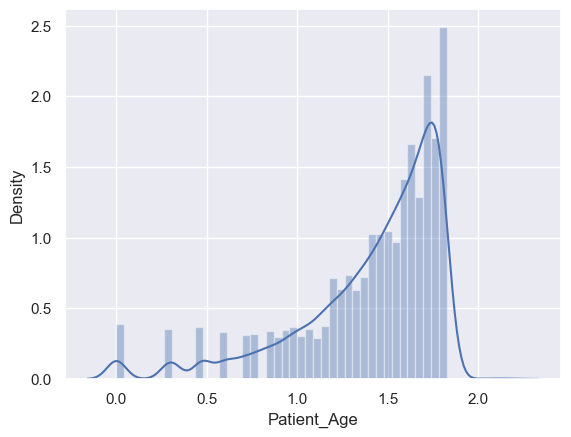

In [12]:
sns.distplot((pharma_data["Patient_Age"].dropna()))
plt.show()

### TRANSFORMING CATEGORICAL DATA

A predictive model cannot accept categorical or string values.
The simplest method is to map each category to an integer (label encoding/Ordinal encoding), however this is not always appropriate beecause it then introduces the concept of an order into a feature which may not inherently be present 0 < 1 < 2 < 3 ...
Another way to encode categorical features is to use dummy variables AKA one hot encoding. This create a new feature for every unique value of a categorical column, and fills this column with either a 1 or a 0 to indicate that this company does or does not belong to this category.

In [13]:
# Transforming binary data in 'Patient_Smoker'
pharma_data["Patient_Smoker"] = pharma_data.Patient_Smoker.replace(["YES","NO"],[1,0])

# Transforming binary data in 'Patient_Rural_Urban'
pharma_data["Patient_Rural_Urban"] = pharma_data.Patient_Rural_Urban.replace(["RURAL","URBAN"],[1,0])

# Transforming binary data in 'Patient_mental_condition'
pharma_data["Patient_mental_condition"] = pharma_data.Patient_mental_condition.replace(["Stable","Stable with severe comorbidities","Unstable"],[1,2,3])

# Transforming binary data in 'Previous_condition_group'
pharma_data["Previous_condition_group"] = pharma_data.Previous_condition_group.replace(["no previous condition", "low previous condition","high previous condition"],[0,1,2])
pharma_data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,BMI_group,Previous_condition_group
0,22374,8,3333,DX6,1.755875,18.479385,1,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,underweight,1
1,18164,5,5740,DX2,1.568202,22.945566,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,normal,0
2,6283,23,10446,DX6,1.690196,27.510027,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,overweight,0
3,5339,51,12011,DX1,0.778151,19.130976,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,normal,0
4,33012,0,12513,DX1,2.110590,1.348400,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,underweight,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,DX2 DX4,1.176091,18.643448,0,1,1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0,normal,2
23093,15503,41,2769,DX6,1.748188,23.684585,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,normal,0
23094,2167,24,7671,DX6,1.806180,27.500039,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,overweight,0
23095,31646,11,5764,DX3,1.414973,23.719125,1,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,normal,1


In [14]:
# Transforming binary data in 'Patient_Smoker'
Test_data["Patient_Smoker"] = Test_data.Patient_Smoker.replace(["YES","NO"],[1,0])

# Transforming binary data in 'Patient_Rural_Urban'
Test_data["Patient_Rural_Urban"] = Test_data.Patient_Rural_Urban.replace(["RURAL","URBAN"],[1,0])

# Transforming binary data in 'Patient_mental_condition'
Test_data["Patient_mental_condition"] = Test_data.Patient_mental_condition.replace(["Stable","Stable with severe comorbidities","Unstable"],[1,2,3])

# Transforming binary data in 'Previous_condition_group'
Test_data["Previous_condition_group"] = Test_data.Previous_condition_group.replace(["no previous condition", "low previous condition","high previous condition"],[0,1,2])
Test_data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,BMI_group,Previous_condition_group
0,19150,40,3709,DX3,1.230449,29.443894,0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,overweight,1
1,23216,52,986,DX6,1.397940,26.836321,0,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,overweight,1
2,11890,50,11821,DX4 DX5,1.806180,25.523280,0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,overweight,1
3,7149,32,3292,DX6,1.633468,27.171155,0,0,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,overweight,1
4,22845,20,9959,DX3,1.707570,25.556192,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,overweight,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,18245,11,9299,DX6,1.462398,29.106314,0,1,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,overweight,1
9299,15598,7,6273,DX1,0.698970,20.616673,0,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,normal,1
9300,11885,16,11473,DX1 DX3 DX4 DX5,1.322219,24.727357,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,normal,0
9301,25101,50,5681,DX4,1.531479,17.517426,0,0,1,1.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0,underweight,2


In [15]:
pharma_data.groupby(["Patient_Rural_Urban"]).agg({"Survived_1_year":"mean"})


,Survived_1_year
Patient_Rural_Urban,
0,0.549476
1,0.667968


It is also obvious that being a rural resident affects their tendency to survive more than being urban

In [16]:
pharma_data.groupby(["Patient_Smoker"]).agg({"Survived_1_year":"mean"})

,Survived_1_year
Patient_Smoker,
0,0.737355
1,0.490915


It is obvious that being a patient smoker affects their tendency to survive.

In [17]:
#Changing "Treated_with_drugs" to catergory type
pharma_data["Treated_with_drugs"] = pharma_data["Treated_with_drugs"].astype("category")

#Representing Each Category Numerically
pharma_data["Treated_with_drugs"] = pharma_data.Treated_with_drugs.cat.codes
pharma_data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,BMI_group,Previous_condition_group
0,22374,8,3333,31,1.755875,18.479385,1,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,underweight,1
1,18164,5,5740,16,1.568202,22.945566,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,normal,0
2,6283,23,10446,31,1.690196,27.510027,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,overweight,0
3,5339,51,12011,0,0.778151,19.130976,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,normal,0
4,33012,0,12513,0,2.110590,1.348400,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,underweight,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,21,1.176091,18.643448,0,1,1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0,normal,2
23093,15503,41,2769,31,1.748188,23.684585,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,normal,0
23094,2167,24,7671,31,1.806180,27.500039,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,overweight,0
23095,31646,11,5764,24,1.414973,23.719125,1,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,normal,1


In [18]:
#Changing "Treated_with_drugs" to catergory type
Test_data["Treated_with_drugs"] = Test_data["Treated_with_drugs"].astype("category")

#Representing Each Category Numerically
Test_data["Treated_with_drugs"] = Test_data.Treated_with_drugs.cat.codes
Test_data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,BMI_group,Previous_condition_group
0,19150,40,3709,24,1.230449,29.443894,0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,overweight,1
1,23216,52,986,31,1.397940,26.836321,0,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,overweight,1
2,11890,50,11821,29,1.806180,25.523280,0,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,overweight,1
3,7149,32,3292,31,1.633468,27.171155,0,0,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,overweight,1
4,22845,20,9959,24,1.707570,25.556192,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,overweight,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,18245,11,9299,31,1.462398,29.106314,0,1,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,overweight,1
9299,15598,7,6273,0,0.698970,20.616673,0,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,normal,1
9300,11885,16,11473,11,1.322219,24.727357,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,normal,0
9301,25101,50,5681,28,1.531479,17.517426,0,0,1,1.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0,underweight,2


In [19]:
# Create dummy variables for the "BMI_group" column in train data
pharma_data = pd.get_dummies(pharma_data, columns=['BMI_group'])

# Create dummy variables for the "BMI_group" column in test data
Test_data = pd.get_dummies(Test_data, columns=['BMI_group'])

Now we can see that for the majority of the features, their standard deviation is much lower after transformation. This is a good thing, it shows that these features are more stable and predictable now. Let’s quickly check the distributions of some of these features too.

# MODEL


We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. We are only focused on training a Random Forest classifier.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


### Data sampling
The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

In [21]:
target = pharma_data["Survived_1_year"]
feature = pharma_data.drop(columns = ["Patient_ID","ID_Patient_Care_Situation","Survived_1_year"])

# Split the train data into a training set and a validation set
X_train, X_test, y_train, y_test = train_test_split(feature,target, test_size=0.2)

In [22]:
print(f"Feature Train size:{X_train.shape}")
print(f"Target Train size:{y_train.shape}")
print(f"Feature Test size:{X_test.shape}")
print(f"Target Test size:{y_test.shape}")

Feature Train size:(18477, 20)
Target Train size:(18477,)
Feature Test size:(4620, 20)
Target Test size:(4620,)


In [23]:
print(target.shape)
print(feature.shape)

(23097,)
(23097, 20)


We are using a Random Forest classifier in this example. A Random Forest sits within the category of ensemble algorithms because internally the Forest refers to a collection of Decision Trees which are tree-based learning algorithms.

In [24]:
# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the classifier on the training data
clf.fit(X_train, y_train)

RandomForestClassifier()

### Evaluation
Now let’s evaluate how well this trained model is able to predict the values of the test dataset. We are going to use 3 metrics to evaluate performance:
- Accuracy = the ratio of correctly predicted observations to the total observations
- Precision = the ability of the classifier to not label a negative sample as positive
- Recall = the ability of the classifier to find all the positive samples
- F1 Score

In [25]:
# Make predictions on the validation data
predictions = clf.predict(X_test)

# Evaluate the predictions using the accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [26]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")
print(f"True negatives: {tn}")
print(f"False positives: {fp}")
print(f"False negatives: {fn}")
print(f"True positives: {tp}")

Accuracy: 0.80
Precision: 0.83
Recall: 0.86
F1 score: 0.84
True negatives: 1211
False positives: 523
False negatives: 414
True positives: 2472


In [27]:
#Dropping unnecessary columns
Test_data = Test_data.drop(columns = ["Patient_ID","ID_Patient_Care_Situation"])

# Make predictions on the test data
predictions = clf.predict(Test_data)
predictions

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [28]:
feature_importances = pd.DataFrame({"feature":X_train.columns,
                                    "importance":clf.feature_importances_
}).sort_values(by = "importance",ascending=True).reset_index()
feature_importances

,index,feature,importance
0,19,BMI_group_obese,0.000000
1,6,Patient_mental_condition,0.000000
2,13,Z,0.000170
3,12,F,0.006219
4,16,BMI_group_underweight,0.006659
5,18,BMI_group_overweight,0.010231
6,15,Previous_condition_group,0.011064
7,8,B,0.011741
8,9,C,0.012752
9,11,E,0.013171


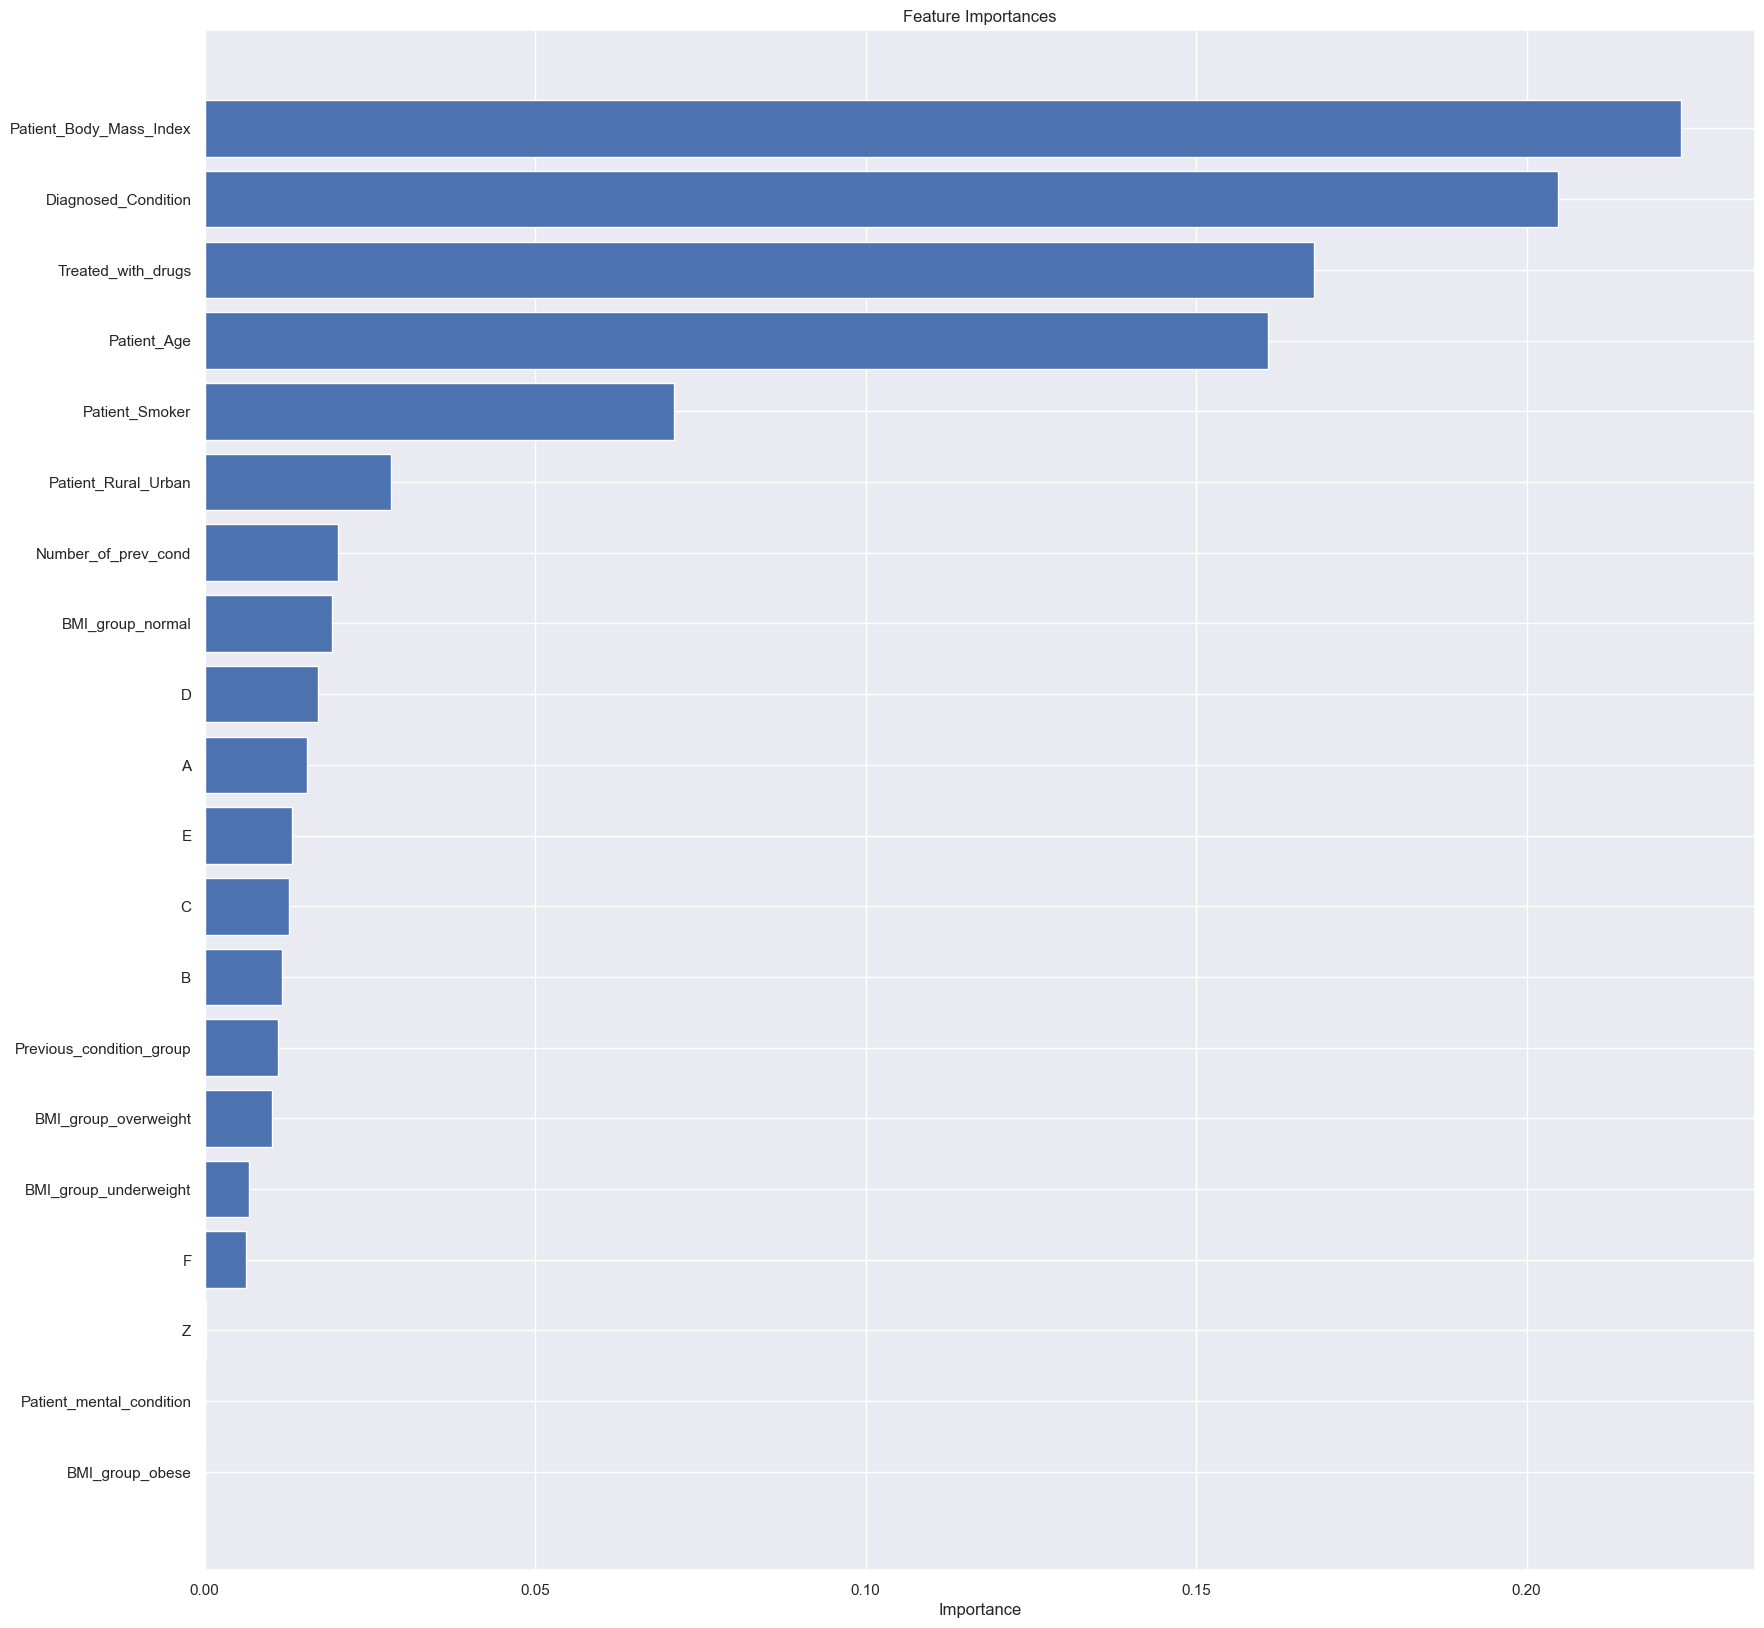

In [29]:
plt.figure(figsize=(20, 20))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b')
plt.yticks(range(len(feature_importances)), feature_importances['feature'])
plt.xlabel('Importance')
plt.show()

In [31]:
# Save the predictions to a CSV file
predictions_df = pd.DataFrame({"prediction": predictions})
predictions_df.to_csv("predictions.csv", index=False)